## Load data

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.lines as mlines
from scipy.stats import mannwhitneyu, wilcoxon

# plt.rcParams.update({'font.size': 12})

In [2]:
datapath = f'/g/data/ng72/as9583/cylc-run/u-dr216/netcdf_new'
variable = 'air_temperature_1p5m'

experiment1 = 'drysoil_d0198_RAL3P2_albedo_bare_' 
allvar = xr.open_dataset(f'{datapath}/{variable}/{experiment1}{variable}.nc')['air_temperature']

experiment2 = 'control_d0198_RAL3P2_' 
control = xr.open_dataset(f'{datapath}/{variable}/{experiment2}{variable}.nc')['air_temperature']

experiment3 = 'control_d0198_RAL3P2_albedo_bare_'
albedo_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment3}{variable}.nc')['air_temperature']

experiment4 = 'control_d0198_RAL3P2_albedo_'
albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment4}{variable}.nc')['air_temperature']

experiment5 = 'control_d0198_RAL3P2_bare_'
bare = xr.open_dataset(f'{datapath}/{variable}/{experiment5}{variable}.nc')['air_temperature']

experiment6 = 'drysoil_d0198_RAL3P2_albedo_'
SM_albedo = xr.open_dataset(f'{datapath}/{variable}/{experiment6}{variable}.nc')['air_temperature']

experiment7 = 'drysoil_d0198_RAL3P2_bare_'
SM_bare = xr.open_dataset(f'{datapath}/{variable}/{experiment7}{variable}.nc')['air_temperature']

experiment8 = 'drysoil_d0198_RAL3P2_'
SM = xr.open_dataset(f'{datapath}/{variable}/{experiment8}{variable}.nc')['air_temperature']

In [3]:
#clip to land only
variable3 = 'land_sea_mask'
landmask = xr.open_dataset(f'{datapath}/{variable3}/{experiment1}{variable3}.nc')["land_binary_mask"].isel(time=0)
allvar = allvar.where(landmask == 1)
control = control.where(landmask == 1)
albedo_bare = albedo_bare.where(landmask == 1)
albedo = albedo.where(landmask == 1)
bare = bare.where(landmask == 1)
SM_albedo = SM_albedo.where(landmask == 1)
SM_bare = SM_bare.where(landmask == 1)
SM = SM.where(landmask == 1)

In [4]:
experiments = {
    "AllVar": allvar,
    "Control": control,
    "Albedo_Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM_Albedo": SM_albedo,
    "SM_Bare": SM_bare,
    "SM": SM
}


## daily averages, whole domain

In [5]:
#daily mean
daily_mean = {}
for name, da in experiments.items():
    # Resample to daily mean (assumes 'time' dimension exists)
    daily_mean[name] = da.resample(time="1D").mean()

#flatten
daily_mean_flat = {}
for name, da in daily_mean.items():
    vals = da.values.flatten()
    #remove NaNs
    daily_mean_flat[name] = vals[~np.isnan(vals)]

#diff from ref
ref_name = "Control"
ref = daily_mean[ref_name]

diff = {}
for name, da in daily_mean.items():
    if name != ref_name:
        diff[name] = da - ref


# # Boxplot of temp distribution
# plt.figure(figsize=(12,6))
# plt.boxplot([daily_mean_flat[name] for name in experiments.keys()],
#             labels=experiments.keys())
# plt.ylabel("Temperature (ºC)")
# plt.title("Temp Distribution Across Experiments")
# plt.xticks(rotation=45)
# plt.show()



INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _va

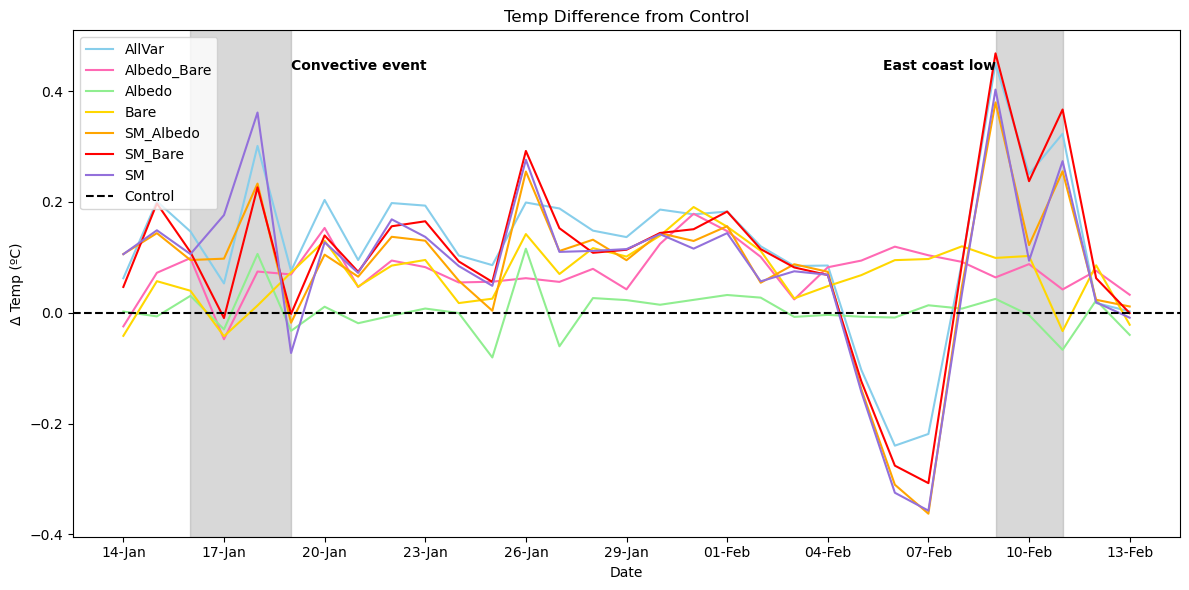

Mann-Whitney U test vs Control (p < 0.05 = significant):
AllVar vs Control: p = 9.609e-274 → Significant
Albedo_Bare vs Control: p = 4.118e-102 → Significant
Albedo vs Control: p = 7.292e-01 → Not significant
Bare vs Control: p = 1.827e-76 → Significant
SM_Albedo vs Control: p = 1.200e-111 → Significant
SM_Bare vs Control: p = 2.086e-185 → Significant
SM vs Control: p = 1.809e-134 → Significant


In [6]:
#temp diff from control,whole domain
ref_name = "Control"
colors = ["skyblue", "hotpink", "lightgreen", "gold", "orange", "red", "mediumpurple", "pink"]

plt.figure(figsize=(12,6))

for i, (name, da) in enumerate(diff.items()):
    #spatial mean over land daily
    time_series = da.mean(dim=["latitude","longitude"], skipna=True)
    plt.plot(time_series.time, time_series, label=name, color=colors[i % len(colors)])

#highlight relevant events
#ECL
start_highlight1 = pd.to_datetime("2020-02-09")  
end_highlight1   = pd.to_datetime("2020-02-11")
plt.axvspan(start_highlight1, end_highlight1, color="grey", alpha=0.3)
plt.text(start_highlight1, plt.ylim()[1]*0.9, "East coast low",
         rotation=0, va="top", ha="right", fontsize=10, color="black", weight='demi')
#convective
start_highlight2 = pd.to_datetime("2020-01-16") 
end_highlight2   = pd.to_datetime("2020-01-19")
plt.axvspan(start_highlight2, end_highlight2, color="grey", alpha=0.3)
plt.text(end_highlight2, plt.ylim()[1]*0.9, "Convective event",
         rotation=0, va="top", ha="left", fontsize=10, color="black", weight='demi')

#plot control proxy
plt.axhline(0, color='k', linestyle='--')

plt.ylabel("Δ Temp (ºC)")
plt.xlabel("Date")
plt.title(f"Temp Difference from {ref_name}")
plt.legend()

dates = pd.to_datetime(time_series.time.values)
plt.xticks(ticks=time_series.time.values[::max(1, len(dates)//10)],
           labels=[d.strftime("%d-%b") for d in dates[::max(1, len(dates)//10)]],
           rotation=0)
control_handle = mlines.Line2D([], [], color='k', linestyle='--', label="Control")

plt.legend(handles=[*plt.gca().get_legend_handles_labels()[0], control_handle], loc = 'upper left')
plt.tight_layout()
plt.show()

print("Mann-Whitney U test vs Control (p < 0.05 = significant):")
for name, vals in daily_mean_flat.items():
    if name != ref_name:
        stat, p = mannwhitneyu(daily_mean_flat[ref_name], vals)
        sig_text = "Significant" if p < 0.05 else "Not significant"
        print(f"{name} vs {ref_name}: p = {p:.3e} → {sig_text}")


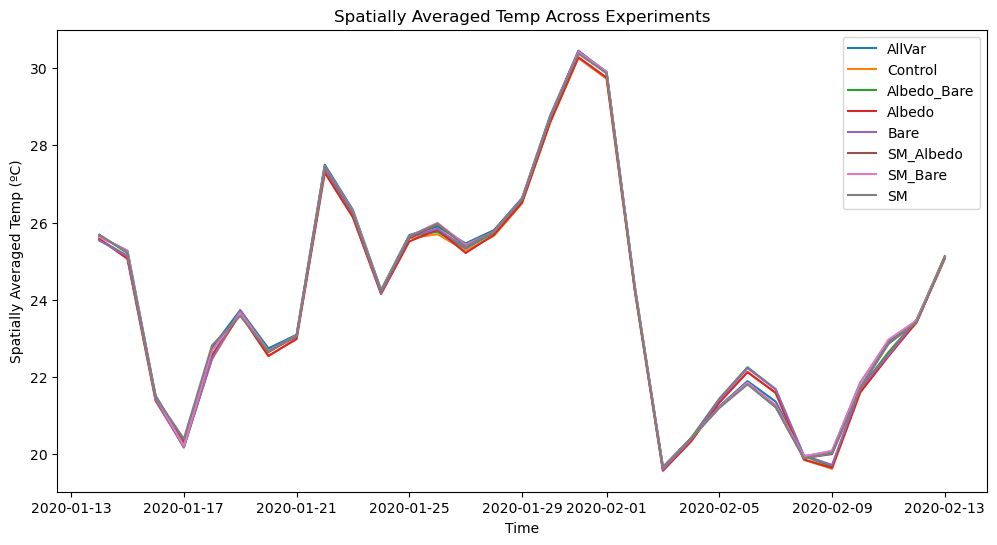

In [7]:
#total T dist
plt.figure(figsize=(12,6))

for name, da in daily_mean.items():
    time_series = da.mean(dim=["latitude","longitude"], skipna=True)
    plt.plot(time_series.time, time_series, label=name)

plt.ylabel("Spatially Averaged Temp (ºC)")
plt.xlabel("Time")
plt.title("Spatially Averaged Temp Across Experiments")
plt.legend()
plt.show()

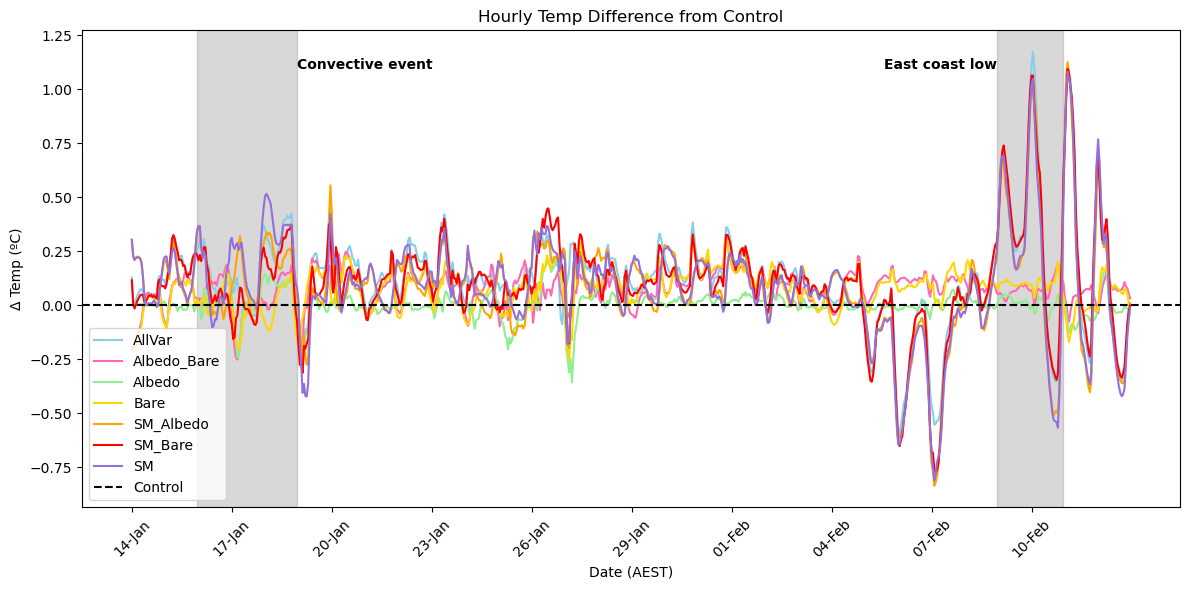

In [8]:
#hourly diff from control, whole domain
ref_name = "Control"
ref = experiments[ref_name]

#diff from control
diff_hourly = {}
for name, da in experiments.items():
    if name != ref_name:
        diff_hourly[name] = da - ref

colors = ["skyblue", "hotpink", "lightgreen", "gold", 
          "orange", "red", "mediumpurple", "pink"]

plt.figure(figsize=(12,6))

#spatial mean at each hour
for i, (name, da) in enumerate(diff_hourly.items()):
    time_series = da.mean(dim=["latitude","longitude"], skipna=True)
    dates_aest = pd.to_datetime(time_series.time.values) + pd.Timedelta(hours=10)
    plt.plot(dates_aest, time_series, label=name, color=colors[i % len(colors)])

#east coast low
plt.axvspan(pd.to_datetime("2020-02-09 00:00") + pd.Timedelta(hours=10),
            pd.to_datetime("2020-02-10 23:59") + pd.Timedelta(hours=10),
            color="grey", alpha=0.3)
plt.text(pd.to_datetime("2020-02-09 00:00") + pd.Timedelta(hours=10),
         plt.ylim()[1]*0.9, "East coast low", va="top", ha="right", fontsize=10, color="black", weight='demi')

#convective event
plt.axvspan(pd.to_datetime("2020-01-16 00:00") + pd.Timedelta(hours=10),
            pd.to_datetime("2020-01-18 23:59") + pd.Timedelta(hours=10),
            color="grey", alpha=0.3)
plt.text(pd.to_datetime("2020-01-18 23:59") + pd.Timedelta(hours=10),
         plt.ylim()[1]*0.9, "Convective event", va="top", ha="left", fontsize=10, color="black", weight='demi')

#line for control 
plt.axhline(0, color='k', linestyle='--')
control_handle = mlines.Line2D([], [], color='k', linestyle='--', label="Control")

plt.ylabel("Δ Temp (ºC)")
plt.xlabel("Date (AEST)")
plt.title(f"Hourly Temp Difference from {ref_name}")
plt.legend(handles=[*plt.gca().get_legend_handles_labels()[0], control_handle], loc="lower left")

#x axis format
plt.xticks(
    ticks=dates_aest[::max(1, len(dates_aest)//10)],
    labels=[d.strftime("%d-%b") for d in dates_aest[::max(1, len(dates_aest)//10)]],
    rotation=45
)

plt.tight_layout()
plt.show()


## Fire scars- daily averages and hourly running 

In [9]:
fires = gpd.read_file('/g/data/ng72/as9583/merged_fires.gpkg')
variable2 = 'surface_altitude'
sa1 = xr.open_dataset(f'{datapath}/{variable2}/{experiment1}{variable2}.nc')[variable2].isel(time=0)

In [10]:
#clip to fires
fires = fires.to_crs("EPSG:7844")

clipped = {}

for name, da in experiments.items():
    da = da.rio.write_crs("EPSG:7844")
    
    clipped_da = da.rio.clip(fires.geometry, fires.crs, drop=True, invert=False)
    
    clipped[name] = clipped_da


In [11]:
allvar = clipped['AllVar']
control =clipped['Control']
albedo_bare =clipped['Albedo_Bare']
albedo =clipped['Albedo']
bare =clipped['Bare']
SM_albedo =clipped['SM_Albedo']
SM_bare=clipped['SM_Bare']
SM =clipped['SM']

In [12]:
#fire dictionary
experiments1 = {
    "All Variables": allvar,
    "Control": control,
    "Albedo + Bare": albedo_bare,
    "Albedo": albedo,
    "Bare": bare,
    "SM + Albedo": SM_albedo,
    "SM + Bare": SM_bare,
    "SM": SM
}

In [13]:
#daily mean
daily_mean1 = {}
for name, da in experiments1.items():
    daily_mean1[name] = da.resample(time="1D").mean()

#flatten
daily_mean_flat1 = {}
for name, da in daily_mean1.items():
    vals1 = da.values.flatten()
    daily_mean_flat1[name] = vals1[~np.isnan(vals1)] #remove Nans

#diff from ref
ref_name1 = "Control"
ref1 = daily_mean[ref_name]

diff1 = {}
for name, da in daily_mean1.items():
    if name != ref_name1:
        diff1[name] = da - ref1

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox'
INFO:flox:Entering _va

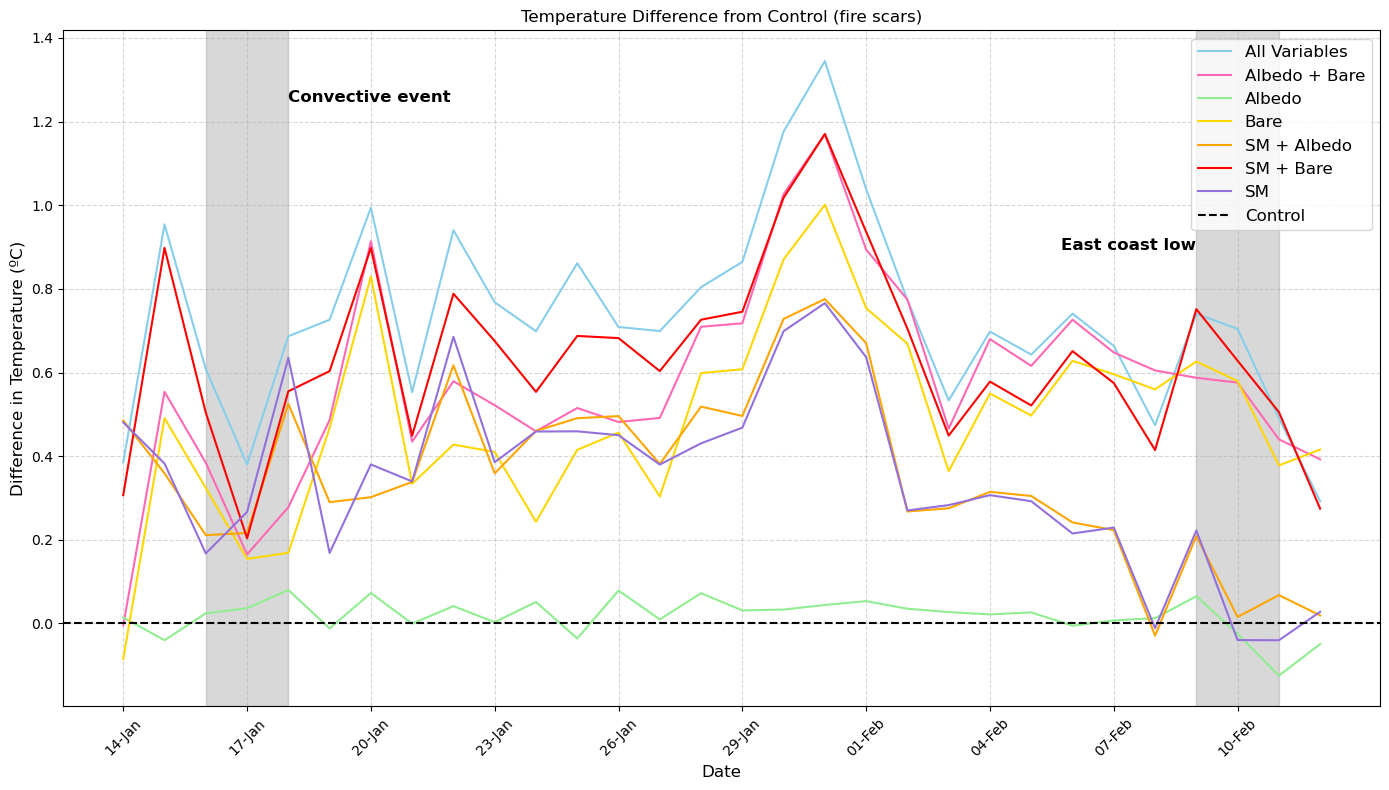

Mann-Whitney U test vs Control (p < 0.05 = significant):
All Variables vs Control: p = 0.000e+00 → Significant
Albedo + Bare vs Control: p = 0.000e+00 → Significant
Albedo vs Control: p = 2.277e-01 → Not significant
Bare vs Control: p = 0.000e+00 → Significant
SM + Albedo vs Control: p = 3.146e-207 → Significant
SM + Bare vs Control: p = 0.000e+00 → Significant
SM vs Control: p = 9.562e-192 → Significant


In [14]:
#whole time diff from control, fire scar
ref_name1 = "Control"
colors = ["skyblue", "hotpink", "lightgreen", "gold", "orange", "red", "mediumpurple", "pink"]

plt.figure(figsize=(14,8))

#daily mean
for i, (name, da) in enumerate(diff1.items()):
    time_series = da.mean(dim=["latitude","longitude"], skipna=True)[:-1]
    plt.plot(time_series.time, time_series, label=name, color=colors[i % len(colors)])

#highlight sig events
#ECL
start_highlight1 = pd.to_datetime("2020-02-09")  
end_highlight1   = pd.to_datetime("2020-02-11")
plt.axvspan(start_highlight1, end_highlight1, color="grey", alpha=0.3)
plt.text(start_highlight1, plt.ylim()[1]*0.65, "East coast low", 
         rotation=0, va="top", ha="right", fontsize=12, color="black", weight='demi')
#convective
start_highlight2 = pd.to_datetime("2020-01-16") 
end_highlight2   = pd.to_datetime("2020-01-18")
plt.axvspan(start_highlight2, end_highlight2, color="grey", alpha=0.3)
plt.text(end_highlight2, plt.ylim()[1]*0.9, "Convective event",
         rotation=0, va="top", ha="left", fontsize=12, color="black", weight='demi')

#line and entry on legend for control
plt.axhline(0, color='k', linestyle='--')
plt.ylabel("Difference in Temperature (ºC)", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.title(f"Temperature Difference from {ref_name} (fire scars)")
plt.legend()

dates = pd.to_datetime(time_series.time.values)
plt.xticks(ticks=time_series.time.values[::max(1, len(dates)//10)],
           labels=[d.strftime("%d-%b") for d in dates[::max(1, len(dates)//10)]],
           rotation=45)
control_handle = mlines.Line2D([], [], color='k', linestyle='--', label="Control")

plt.legend(handles=[*plt.gca().get_legend_handles_labels()[0], control_handle], loc = 'upper right', fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.savefig("/g/data/ng72/as9583/figures/temp_timeseries.png", dpi=300, bbox_inches="tight")
plt.show()

print("Mann-Whitney U test vs Control (p < 0.05 = significant):")
for name, vals in daily_mean_flat1.items():
    if name != ref_name:
        stat, p = mannwhitneyu(daily_mean_flat1[ref_name], vals)
        sig_text = "Significant" if p < 0.05 else "Not significant"
        print(f"{name} vs {ref_name}: p = {p:.3e} → {sig_text}")

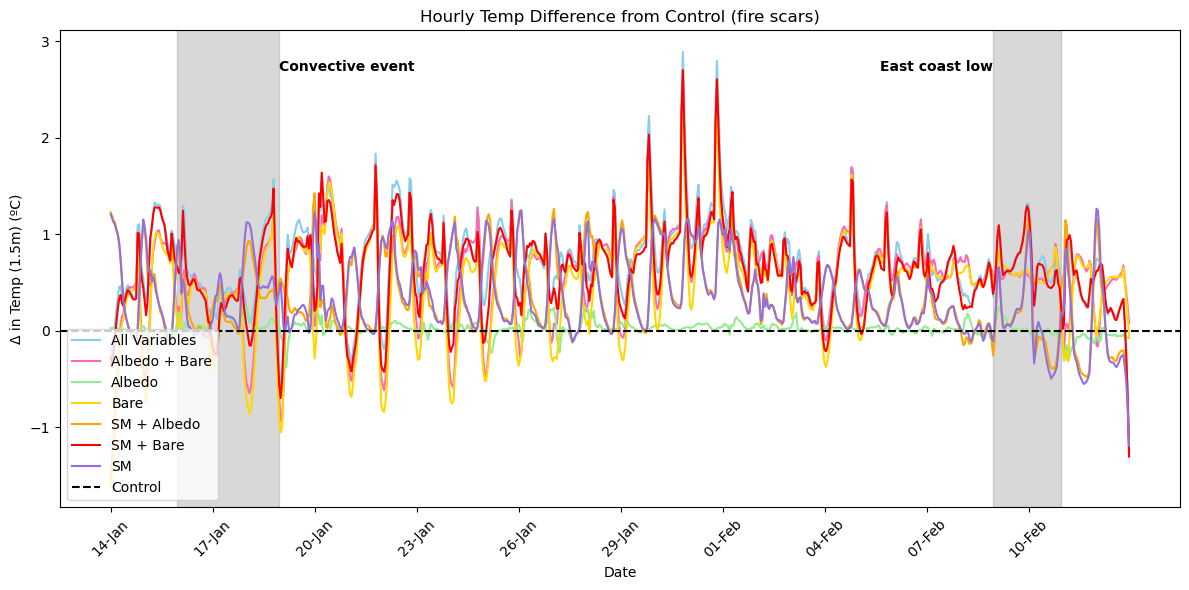

In [15]:
#hourly diff from control, fire scar
ref_name = "Control"
ref = experiments1[ref_name]

#diff from control
diff_hourly = {}
for name, da in experiments1.items():
    if name != ref_name:
        diff_hourly[name] = da - ref

colors = ["skyblue", "hotpink", "lightgreen", "gold", 
          "orange", "red", "mediumpurple", "pink"]

plt.figure(figsize=(12,6))

for i, (name, da) in enumerate(diff_hourly.items()):
    time_series = da.mean(dim=["latitude","longitude"], skipna=True)
    dates_aest = pd.to_datetime(time_series.time.values) + pd.Timedelta(hours=10) #shift to AEST
    plt.plot(dates_aest, time_series, label=name, color=colors[i % len(colors)])

#ECL event
plt.axvspan(pd.to_datetime("2020-02-09 00:00") + pd.Timedelta(hours=10),
            pd.to_datetime("2020-02-10 23:59") + pd.Timedelta(hours=10),
            color="grey", alpha=0.3)
plt.text(pd.to_datetime("2020-02-09 00:00") + pd.Timedelta(hours=10),
         plt.ylim()[1]*0.9, "East coast low", va="top", ha="right", fontsize=10, color="black", weight='demi')

#convective
plt.axvspan(pd.to_datetime("2020-01-16 00:00") + pd.Timedelta(hours=10),
            pd.to_datetime("2020-01-18 23:59") + pd.Timedelta(hours=10),
            color="grey", alpha=0.3)
plt.text(pd.to_datetime("2020-01-18 23:59") + pd.Timedelta(hours=10),
         plt.ylim()[1]*0.9, "Convective event", va="top", ha="left", fontsize=10, color="black", weight='demi')

#baseline control
plt.axhline(0, color='k', linestyle='--')
control_handle = mlines.Line2D([], [], color='k', linestyle='--', label="Control")

plt.ylabel("Δ in Temp (1.5m) (ºC)")
plt.xlabel("Date")
plt.title(f"Hourly Temp Difference from {ref_name} (fire scars)")
plt.legend(handles=[*plt.gca().get_legend_handles_labels()[0], control_handle], loc="lower left")

#format x axis
plt.xticks(
    ticks=dates_aest[::max(1, len(dates_aest)//10)],
    labels=[d.strftime("%d-%b") for d in dates_aest[::max(1, len(dates_aest)//10)]],
    rotation=45
)

plt.tight_layout()
plt.show()


# diurnal

## whole dom

In [16]:
#spatial mean
t_series = {}
for name, da in experiments.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10))
    t_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)


In [17]:
#diurnal
t_diurnal = {}
for name, series in t_series.items():
    t_diurnal[name] = series.groupby("time.hour").mean("time")


INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

In [18]:
#compute diff
ref = t_diurnal["Control"]

t_diff = {}
for name, series in t_diurnal.items():
    if name != "Control":
        #align on hour
        series, ref_aligned = xr.align(series, ref)
        t_diff[name] = series - ref_aligned


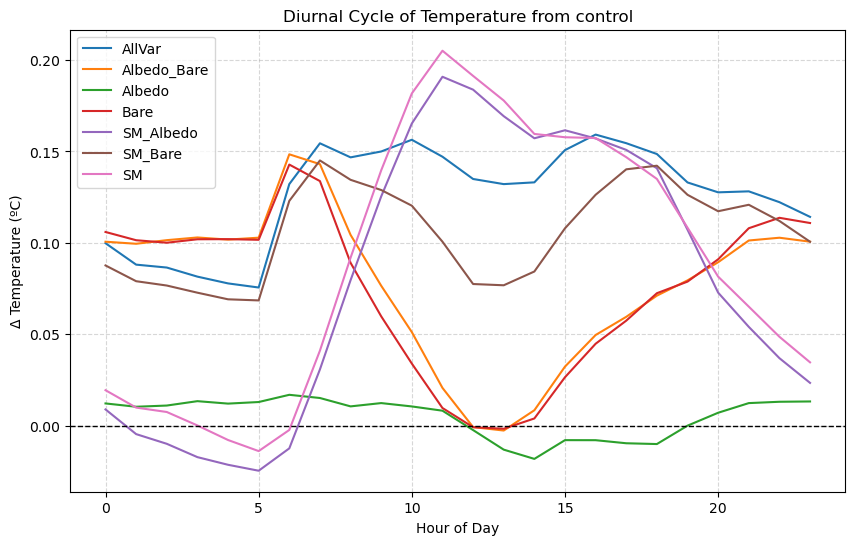

In [19]:
#plot diff
plt.figure(figsize=(10,6))

for name, diff in t_diff.items():
    plt.plot(diff["hour"], diff.values, label=f"{name}")

plt.axhline(0, color="k", linestyle="--", linewidth=1)
plt.title("Diurnal Cycle of Temperature from control")
plt.xlabel("Hour of Day")
plt.ylabel("Δ Temperature (ºC)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

## fire scars

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Enteri

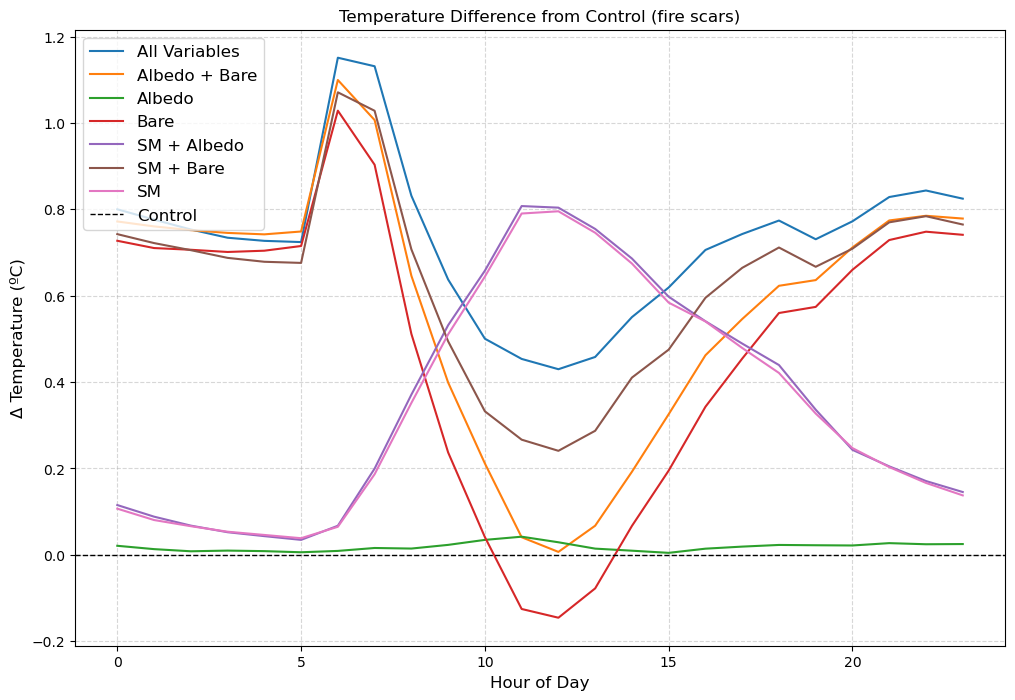

Mann-Whitney U test vs Control (p < 0.05 = significant):
All Variables vs Control: p = 2.700e-01 → Not significant
Albedo + Bare vs Control: p = 3.377e-01 → Not significant
Albedo vs Control: p = 8.126e-01 → Not significant
Bare vs Control: p = 4.273e-01 → Not significant
SM + Albedo vs Control: p = 6.134e-01 → Not significant
SM + Bare vs Control: p = 3.173e-01 → Not significant
SM vs Control: p = 6.280e-01 → Not significant


In [20]:
#spatial mean
t_series = {}
for name, da in experiments1.items():
    da = da.assign_coords(time=da.time + pd.Timedelta(hours=10)) #shift to AEST
    t_series[name] = da.mean(dim=["latitude", "longitude"], skipna=True)

#diurnal cycle
t_diurnal = {}
for name, series in t_series.items():
    t_diurnal[name] = series.groupby("time.hour").mean("time")

ref = t_diurnal["Control"]

#diff from control
t_diff = {}
for name, series in t_diurnal.items():
    if name != "Control":
        #align on hour
        series, ref_aligned = xr.align(series, ref)
        t_diff[name] = series - ref_aligned

plt.figure(figsize=(12,8))

for name, diff in t_diff.items():
    plt.plot(diff["hour"], diff.values, label=f"{name}")

plt.axhline(0, color="k", linestyle="--", linewidth=1, label = 'Control')
plt.title("Temperature Difference from Control (fire scars)")
plt.xlabel("Hour of Day", fontsize = 12)
plt.ylabel("Δ Temperature (ºC)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
# plt.savefig("/g/data/ng72/as9583/figures/temp_local.png", dpi=300, bbox_inches="tight")
plt.show()

ref_name = "Control"
ref_series = t_diurnal[ref_name]

print("Mann-Whitney U test vs Control (p < 0.05 = significant):")
for name, series in t_diurnal.items():
    if name != ref_name:
        # Compare the hourly series
        stat, p = mannwhitneyu(ref_series.values, series.values)
        sig_text = "Significant" if p < 0.05 else "Not significant"
        print(f"{name} vs {ref_name}: p = {p:.3e} → {sig_text}")


In [21]:
#sig test at each hour
ref_name = "Control"
ref_series = t_series[ref_name]

print("Wilcoxon test vs Control (hour-by-hour):")

for name, series in t_series.items():
    if name == ref_name:
        continue

    print(f"\n{name} vs {ref_name}:")

    for hr in range(24):
        #all values this hour at all days
        ref_vals = ref_series.sel(time=ref_series.time.dt.hour == hr).values
        exp_vals = series.sel(time=series.time.dt.hour == hr).values

        #arrays same length
        min_len = min(len(ref_vals), len(exp_vals))
        ref_vals = ref_vals[:min_len]
        exp_vals = exp_vals[:min_len]

        #skip constants
        if np.all(ref_vals == exp_vals):
            stat, p = np.nan, np.nan
        else:
            try:
                stat, p = wilcoxon(ref_vals, exp_vals)
            except ValueError:
                stat, p = np.nan, np.nan

        sig_text = "Significant" if p < 0.05 else "Not significant"
        print(f"Hour {hr}: p = {p:.3e} → {sig_text}")

Wilcoxon test vs Control (hour-by-hour):

All Variables vs Control:
Hour 0: p = 1.863e-09 → Significant
Hour 1: p = 1.863e-09 → Significant
Hour 2: p = 1.863e-09 → Significant
Hour 3: p = 1.863e-09 → Significant
Hour 4: p = 1.863e-09 → Significant
Hour 5: p = 1.863e-09 → Significant
Hour 6: p = 1.863e-09 → Significant
Hour 7: p = 1.863e-09 → Significant
Hour 8: p = 5.588e-09 → Significant
Hour 9: p = 4.712e-07 → Significant
Hour 10: p = 2.689e-05 → Significant
Hour 11: p = 3.790e-06 → Significant
Hour 12: p = 1.061e-05 → Significant
Hour 13: p = 1.991e-06 → Significant
Hour 14: p = 3.539e-08 → Significant
Hour 15: p = 3.725e-09 → Significant
Hour 16: p = 3.725e-09 → Significant
Hour 17: p = 1.863e-09 → Significant
Hour 18: p = 1.863e-09 → Significant
Hour 19: p = 1.863e-09 → Significant
Hour 20: p = 1.863e-09 → Significant
Hour 21: p = 1.863e-09 → Significant
Hour 22: p = 1.863e-09 → Significant
Hour 23: p = 1.863e-09 → Significant

Albedo + Bare vs Control:
Hour 0: p = 1.863e-09 → Sig

INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox' since nanquantile
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox' since nanquantile
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'numpy'
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flox:_choose_engine: Choosing 'flox' since nanquantile
INFO:flox:Entering _validate_reindex: reindex is None
INFO:flox:Leaving _validate_reindex: method = None, returning None
INFO:flo

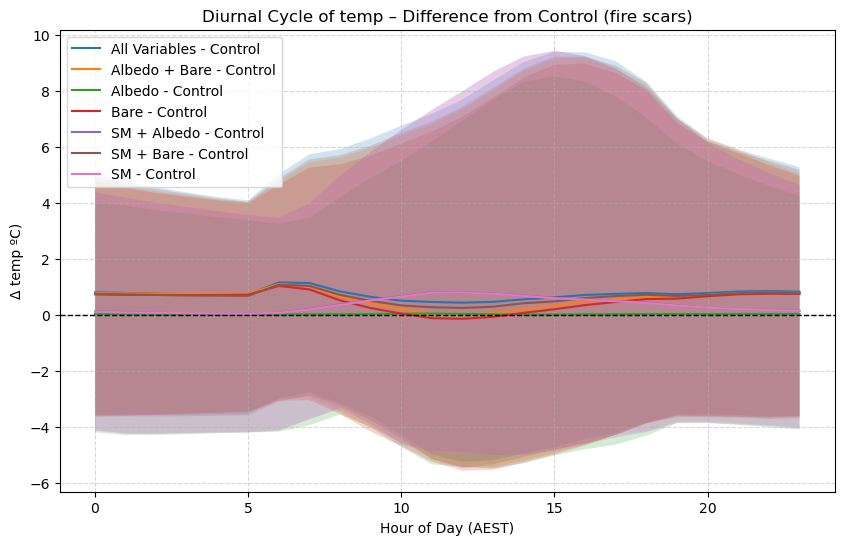

In [22]:
t_diurnal = {}
for name, series in t_series.items():
    grouped = series.groupby("time.hour")
    t_diurnal[name] = {
        "mean": grouped.mean("time"),
        "p05": grouped.quantile(0.05, dim="time"),
        "p95": grouped.quantile(0.95, dim="time"),
    }

ref = t_diurnal["Control"]["mean"]

#compute diff
t_diff = {}
for name, stats in t_diurnal.items():
    if name != "Control":
        #align by time
        mean, ref_aligned = xr.align(stats["mean"], ref)
        p05, _ = xr.align(stats["p05"], ref)
        p95, _ = xr.align(stats["p95"], ref)

        t_diff[name] = {
            "mean": mean - ref_aligned,
            "p05": p05 - ref_aligned,
            "p95": p95 - ref_aligned,
        }

plt.figure(figsize=(10,6))
for name, stats in t_diff.items():
    hours = stats["mean"]["hour"]

    #mean line
    plt.plot(hours, stats["mean"].values, label=f"{name} - Control")

    #5th–95th shading
    plt.fill_between(
        hours,
        stats["p05"].values,
        stats["p95"].values,
        alpha=0.2
    )

plt.axhline(0, color="k", linestyle="--", linewidth=1)
plt.title("Diurnal Cycle of temp – Difference from Control (fire scars)")
plt.xlabel("Hour of Day (AEST)")
plt.ylabel("Δ temp ºC)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()
